## Marianne Trujillo Alltamirano
### Exp. 740694
01/03/2023

# Tarea - Ajuste de curvas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [25]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

In [26]:
import pandas as pd
import scipy.optimize as opt
import numpy as np

In [29]:
x = np.linspace(0,26,27)
y = data

m = len(y)
ones = np.ones([m, 1])
x1 = np.reshape(x, [m, 1])
x2 = np.reshape(x**2, [m, 1])
x3 = np.reshape(x**3, [m, 1])

X1 = np.hstack((ones, x1))
X2 = np.hstack((ones, x1, x2))
X3 = np.hstack((ones, x1, x2, x3))

beta_inicial1 = np.random.rand(2)
beta_inicial2 = np.random.rand(3)
beta_inicial3 = np.random.rand(4)

y_vector = np.reshape(y, [m, 1])

def foo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    prediccion = X @ beta
    error = prediccion - y
    return (error.T @ error)[0][0]

In [30]:
sol1 = opt.minimize(foo, beta_inicial1, args=(X1, y_vector))
sol2 = opt.minimize(foo, beta_inicial2, args=(X2, y_vector))
sol3 = opt.minimize(foo, beta_inicial3, args=(X3, y_vector))

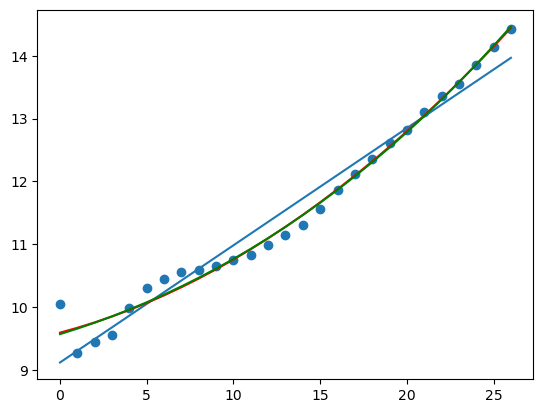

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(x, y)
plt.plot(x, X1 @ sol1.x)
plt.plot(x, X2 @ sol2.x, "r")
plt.plot(x, X3 @ sol3.x, "g")

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

## 1. 

In [7]:
import pandas as pd
data = pd.read_csv("population_data.csv")

x = data["Year"].values - 1950
y = data["Poblacion"].values

m = len(y)
ones = np.ones([m, 1])
x1 = np.reshape(x, [m, 1])
x2 = np.reshape(x**2, [m, 1])
x3 = np.reshape(x**3, [m, 1])

X1 = np.hstack((ones, x1))
X2 = np.hstack((ones, x1, x2))
X3 = np.hstack((ones, x1, x2, x3))

beta_inicial1 = np.random.rand(2)
beta_inicial2 = np.random.rand(3)
beta_inicial3 = np.random.rand(4)

y_vector = np.reshape(y, [m, 1])

def foo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    prediccion = X @ beta
    error = prediccion - y
    return (error.T @ error)[0][0]

In [8]:
sol1 = opt.minimize(foo, beta_inicial1, args=(X1, y_vector))
sol2 = opt.minimize(foo, beta_inicial2, args=(X2, y_vector))
sol3 = opt.minimize(foo, beta_inicial3, args=(X3, y_vector))

In [9]:
sol1

      fun: 212137169.54505745
 hess_inv: array([[ 7.05488776e-03, -2.37378117e-09],
       [-2.37378117e-09,  8.01492206e-11]])
      jac: array([0., 4.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 269
      nit: 8
     njev: 83
   status: 2
  success: False
        x: array([24138.02230688,  1543.97328488])

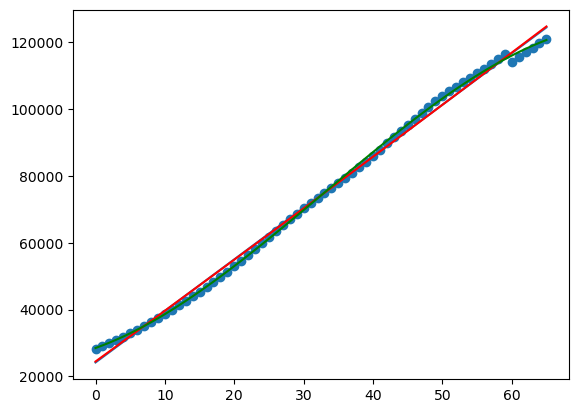

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(x, y)
plt.plot(x, X1 @ sol1.x)
plt.plot(x, X2 @ sol2.x, "r")
plt.plot(x, X3 @ sol3.x, "g")


<BarContainer object of 3 artists>

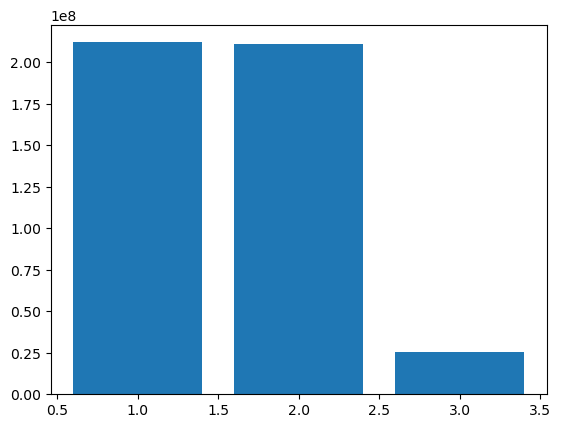

In [11]:
plt.figure()
plt.bar([1, 2, 3], [sol1.fun, sol2.fun, sol3.fun])

## 2. 

In [13]:
import pandas as pd
data = pd.read_csv("population_data.csv")

x = data["Year"].values - 1950
y = data["Nacimientos"].values

m = len(y)
ones = np.ones([m, 1])
x1 = np.reshape(x, [m, 1])
x2 = np.reshape(x**2, [m, 1])
x3 = np.reshape(x**3, [m, 1])

X1 = np.hstack((ones, x1))
X2 = np.hstack((ones, x1, x2))
X3 = np.hstack((ones, x1, x2, x3))

beta_inicial1 = np.random.rand(2)
beta_inicial2 = np.random.rand(3)
beta_inicial3 = np.random.rand(4)

y_vector = np.reshape(y, [m, 1])

def foo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    prediccion = X @ beta
    error = prediccion - y
    return (error.T @ error)[0][0]

In [14]:
sol1 = opt.minimize(foo, beta_inicial1, args=(X1, y_vector))
sol2 = opt.minimize(foo, beta_inicial2, args=(X2, y_vector))
sol3 = opt.minimize(foo, beta_inicial3, args=(X3, y_vector))

In [15]:
sol1

      fun: 4737927618764.423
 hess_inv: array([[ 2.92607804e-02, -6.66528105e-04],
       [-6.66528105e-04,  2.05299979e-05]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 109
      nit: 6
     njev: 34
   status: 0
  success: True
        x: array([1562038.68556721,   21997.84760805])

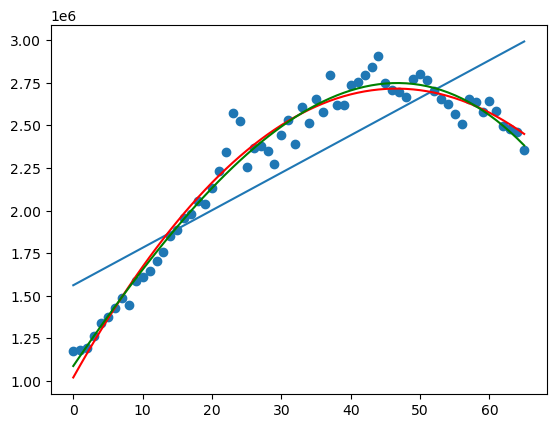

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(x, y)
plt.plot(x, X1 @ sol1.x)
plt.plot(x, X2 @ sol2.x, "r")
plt.plot(x, X3 @ sol3.x, "g")

<BarContainer object of 3 artists>

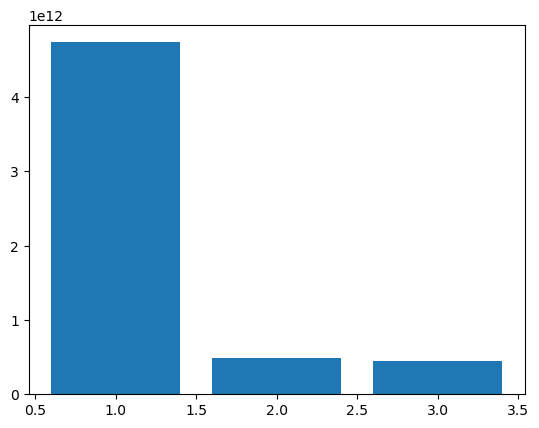

In [17]:
plt.figure()
plt.bar([1, 2, 3], [sol1.fun, sol2.fun, sol3.fun])